### **Synthesized Data Generation for Self-supervised Learning**

* **Date:** April 2022
* **Team Member:**


#### **1 SIR Model**

Import libraries

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from tqdm import tqdm


Setting up parameters

In [257]:
### ------------------- Parameters to Vary ------------------- ###

# lambda: number of people that a susceptible person interacts with per time step
# p: probability of getting infected if a susceptible person interacts with an infectious person
# gamma: recovery rate (recovery probability within one time step)
lam, p, gamma = 3, 0.05, 1./14 # set lam = 2 vs 20, p = 0.3, gamma = 1/14

# probability of getting infected every time step
#beta = 1 - pow(1-p,lam)
beta = min(1, lam * p) # beta <= 1 by definition


### ------------------- Fixed Parameters ------------------- ###

# Total population.
N_total = 300000000

# Some vaccinated people are immune
N = N_total

# A grid of time points (in days) for the detecting period
t_set = np.linspace(0, 365, 366)

# Initial number of infected and immune individuals, I0 and R0.
I0, R0 = 10, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

Model Engine

In [258]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# The SIR model differential equations.
def deriv_dynamic(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


Define dynamic parameters

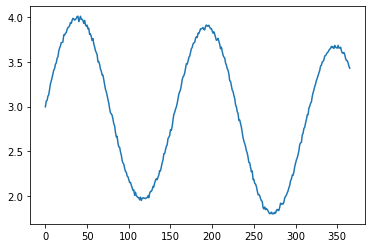

In [294]:
### ------------------ Generate Random R_0 ------------------

x = np.linspace(0, 365, 366)

def f(x):
    return (np.sin((np.random.random()/20) * x) + np.random.normal(scale=0.01, size=len(x)) + np.cos((np.random.random()/20) * x) + np.random.normal(scale=0.01, size=len(x)) + 2)

R_0_random = f(x)
plt.plot(x, R_0_random)

In [254]:
R_0_random.shape

(366,)

In [260]:
### ------------------ Piece-wise R_0 and beta ------------------ ###

# L_shutdown = 50 # The day that R0 changed

# L_relax = 125 # The day that restrictions are relaxed

# def R_0_dynamic(t):
#     value = 1.0
#     if t < L_shutdown:
#         value = 5.0
#     elif t < L_relax:
#         value = 0.9
#     else:
#         value = 1.5
#     return value

# def beta_dynamic(t):
#     return R_0_dynamic(t) * gamma

### ------------------ Logistic R_0 and beta ------------------ ###
# R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.9

# def logistic_R_0(t):
#     return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

# def logistic_beta(t):
#     return logistic_R_0(t) * gamma

### ------------------ Random R_0 and beta ------------------ ###

def random_R_0(t):
    return R_0_random[int(t)]

def random_beta(t):
    return random_R_0(t) * gamma


Generate Trajectories for S(t), I(t), R(t)

In [4]:
### ----------------- Static Parameters ----------------- ###

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t_set, args=(N, beta, gamma))
S, I, R = ret.T

# Here outputs S,I,R are trajectories over the simulation time horizon, 
# i.e., S is a vector of the numbers of susceptible people at each time step, check by printing it out:
#print S

In [292]:
### ----------------- Dynamic Parameters ----------------- ###

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_dynamic, y0, t_set, args=(N, random_beta, gamma))
S, I, R = ret.T

Plot Trajectories for S(t), I(t), R(t)

E:\ProgramData\Anaconda3\envs\decision-analytics\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


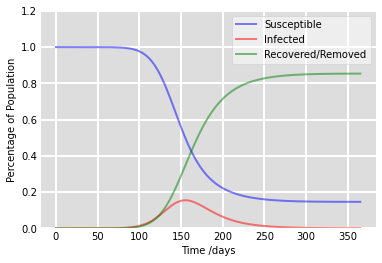

In [293]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t_set, S/N_total, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t_set, I/N_total, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t_set, R/N_total, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Percentage of Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [265]:
np.concatenate((S.reshape(-1, 1), I.reshape(-1, 1), R.reshape(-1, 1)), axis=1)

array([[2.99999990e+08, 1.00000000e+01, 0.00000000e+00],
       [2.99999985e+08, 1.43162625e+01, 8.59239058e-01],
       [2.99999977e+08, 2.05877169e+01, 2.09227754e+00],
       ...,
       [7.12645490e+05, 3.60329234e-02, 2.99287354e+08],
       [7.12645490e+05, 3.35672603e-02, 2.99287354e+08],
       [7.12645490e+05, 3.12693800e-02, 2.99287354e+08]])

E:\ProgramData\Anaconda3\envs\decision-analytics\lib\site-packages\ipykernel_launcher.py:64: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


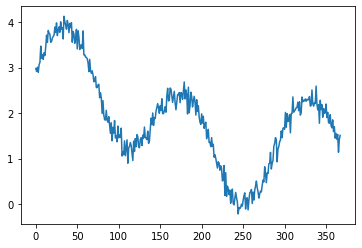

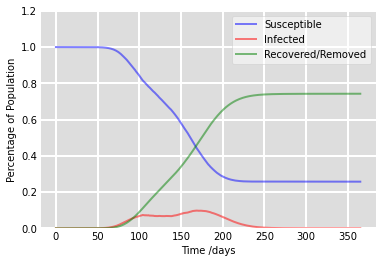

In [21]:
### ------------------- Parameters to Vary ------------------- ###

# lambda: number of people that a susceptible person interacts with per time step
# p: probability of getting infected if a susceptible person interacts with an infectious person
# gamma: recovery rate (recovery probability within one time step)
gamma = 1./14 # set lam = 2 vs 20, p = 0.3, gamma = 1/14

### ------------------- Fixed Parameters ------------------- ###

# Total population.
N = 300000000

# A grid of time points (in days) for the detecting period
t_set = np.linspace(0, 365, 366)

# Initial number of infected and immune individuals, I0 and R0.
I0, R0 = 10, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# The SIR model differential equations.
def deriv_dynamic(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

x = np.linspace(0, 367, 368)

def f(x):
    return (np.sin((np.random.random()/20) * x) + np.random.normal(scale=0.1, size=len(x)) + np.cos((np.random.random()/20) * x) + np.random.normal(scale=0.1, size=len(x)) + 2)

R_0_random = f(x)
plt.plot(x, R_0_random)

def random_R_0(t):
    return R_0_random[int(t)]

def random_beta(t):
    return random_R_0(t) * gamma


### ----------------- Dynamic Parameters ----------------- ###

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_dynamic, y0, t_set, args=(N, random_beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t_set, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t_set, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t_set, R/N, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Percentage of Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [2]:
def f(x):
    return (np.sin((np.random.random()/20) * x) + np.random.normal(scale=0.1, size=len(x)) + 
            np.cos((np.random.random()/20) * x) + np.random.normal(scale=0.1, size=len(x)) + 2)

def deriv_dynamic(y, t, N, beta, gamma):
            S, I, R = y
            dSdt = -beta(t) * S * I / N
            dIdt = beta(t) * S * I / N - gamma * I
            dRdt = gamma * I
            return dSdt, dIdt, dRdt

def generate_data(n_samples=10):
    
    data = []
    labels = []
    
    ### ------------------- Parameters to Vary ------------------- ###

    # lambda: number of people that a susceptible person interacts with per time step
    # p: probability of getting infected if a susceptible person interacts with an infectious person
    # gamma: recovery rate (recovery probability within one time step)
    gamma = 1./14 # set lam = 2 vs 20, p = 0.3, gamma = 1/14

    ### ------------------- Fixed Parameters ------------------- ###

    # Total population.
    N = 300000000

    # A grid of time points (in days) for the detecting period
    t_set = np.linspace(0, 365, 366)

    # Initial number of infected and immune individuals, I0 and R0.
    I0, R0 = 10, 0

    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0
    
    for i in tqdm(range(n_samples), total=n_samples):
        
        x = np.linspace(0, 367, 368)

        R_0_random = f(x)
        # plt.plot(x, R_0_random)

        def random_R_0(t):
            return R_0_random[int(t)]

        def random_beta(t):
            return random_R_0(t) * gamma

        # Initial conditions vector
        y0 = S0, I0, R0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv_dynamic, y0, t_set, args=(N, random_beta, gamma))
        S, I, R = ret.T
        
        data.append(np.concatenate((S.reshape(-1, 1), I.reshape(-1, 1), R.reshape(-1, 1)), axis=1))
        labels.append(R_0_random[:366])
    
    return np.array(data), np.array(labels)

In [3]:
data, R_0 = generate_data(20000)

100%|██████████| 20000/20000 [40:53<00:00,  8.15it/s]


In [4]:
data.shape

(20000, 366, 3)

In [6]:
%pwd

'e:\\OneDriveLocal\\OneDrive\\学习\\Graduate Study\\2022Spring\\dabp\\project\\dabp-pandemic-simulation\\nbs'

In [7]:
import pickle

with open("../nn/data/data.pkl", 'wb') as f:
    
    pickle.dump((data, R_0), f)